<a href="https://colab.research.google.com/github/AnkitKhatawaliya/DataSets/blob/main/Titanic_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [564]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

In [565]:
url="https://raw.githubusercontent.com/sukhioo7/dataset/main/titanic.csv"
Data=pd.read_csv(url)
Backup = Data

In [566]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Gender       891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [567]:
Data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Gender           0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [568]:
Data.drop('Cabin',axis=1,inplace=True)

<Axes: xlabel='PassengerId', ylabel='Age'>

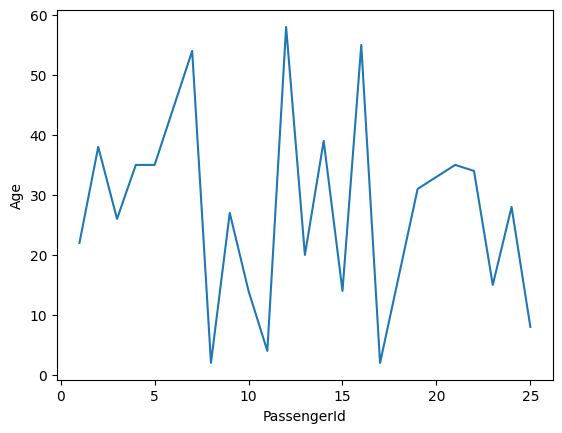

In [569]:
sns.lineplot(data=Data.head(25),x='PassengerId',y='Age')

<Axes: >

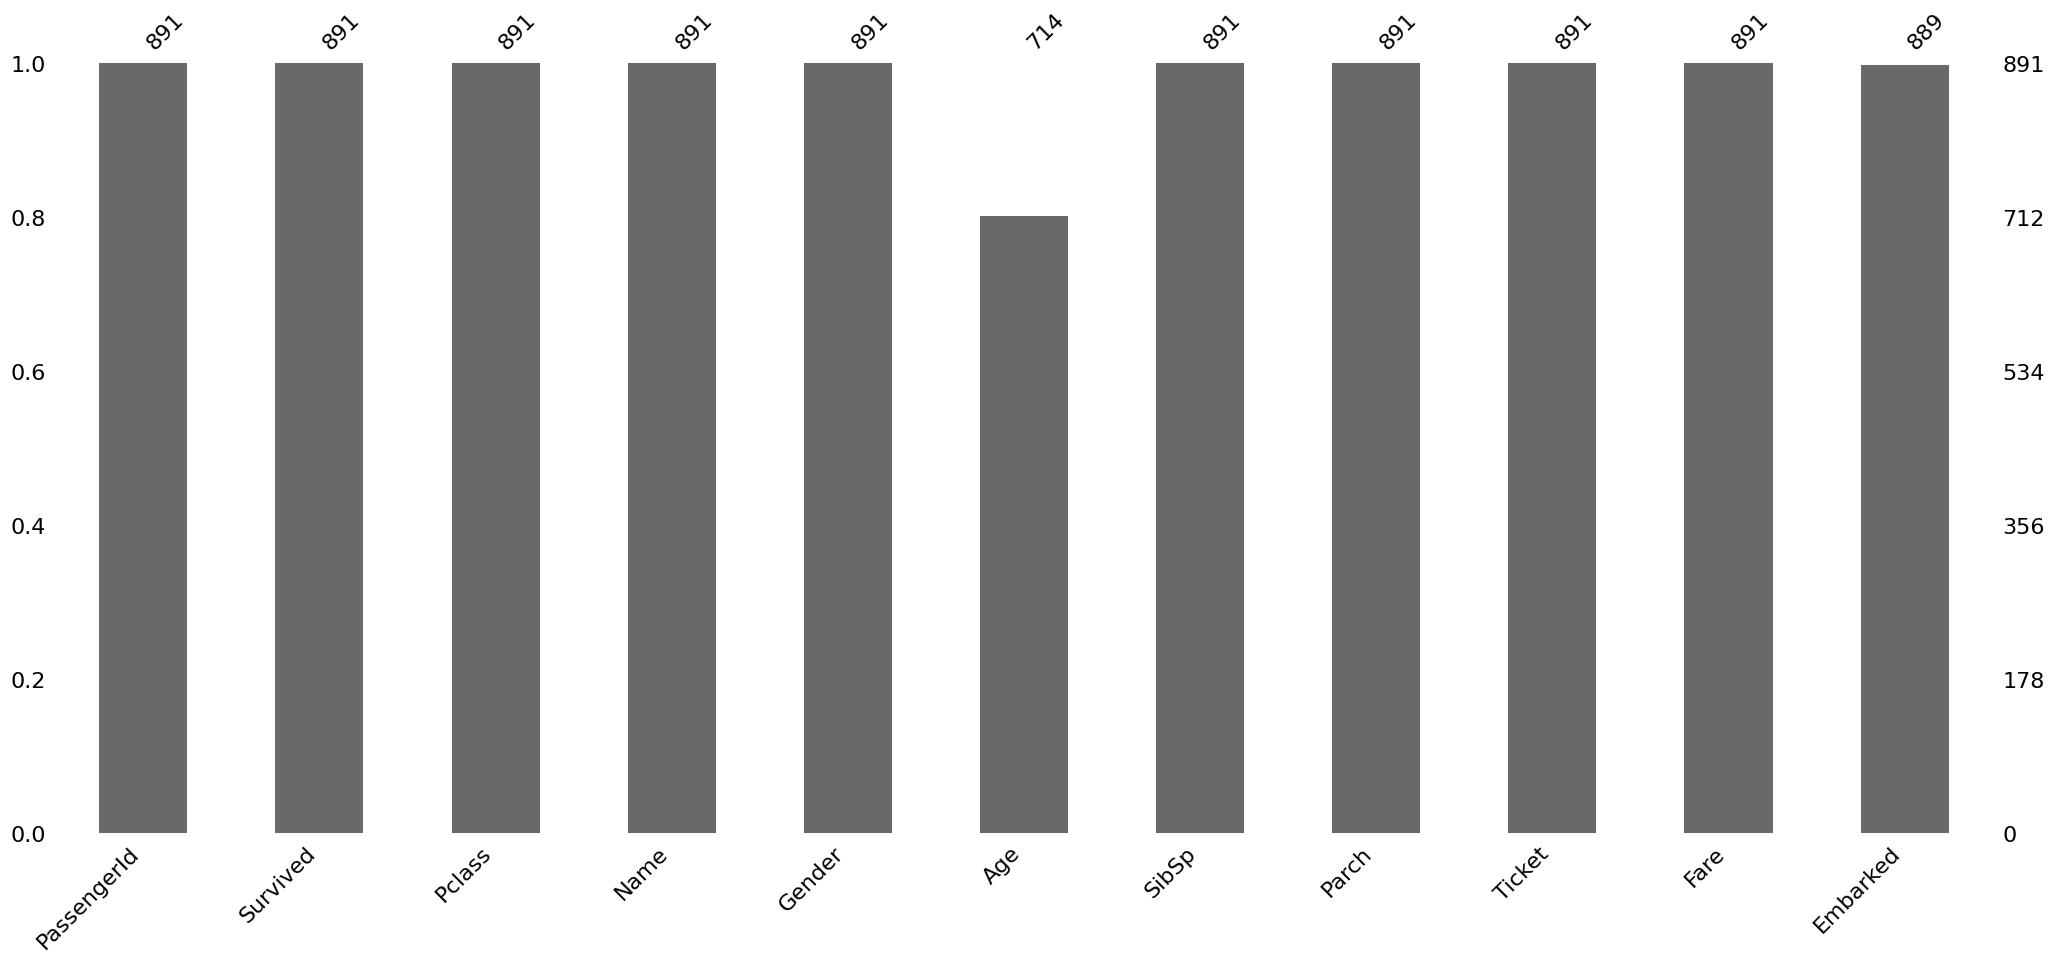

In [529]:
msno.bar(Data)

<Axes: >

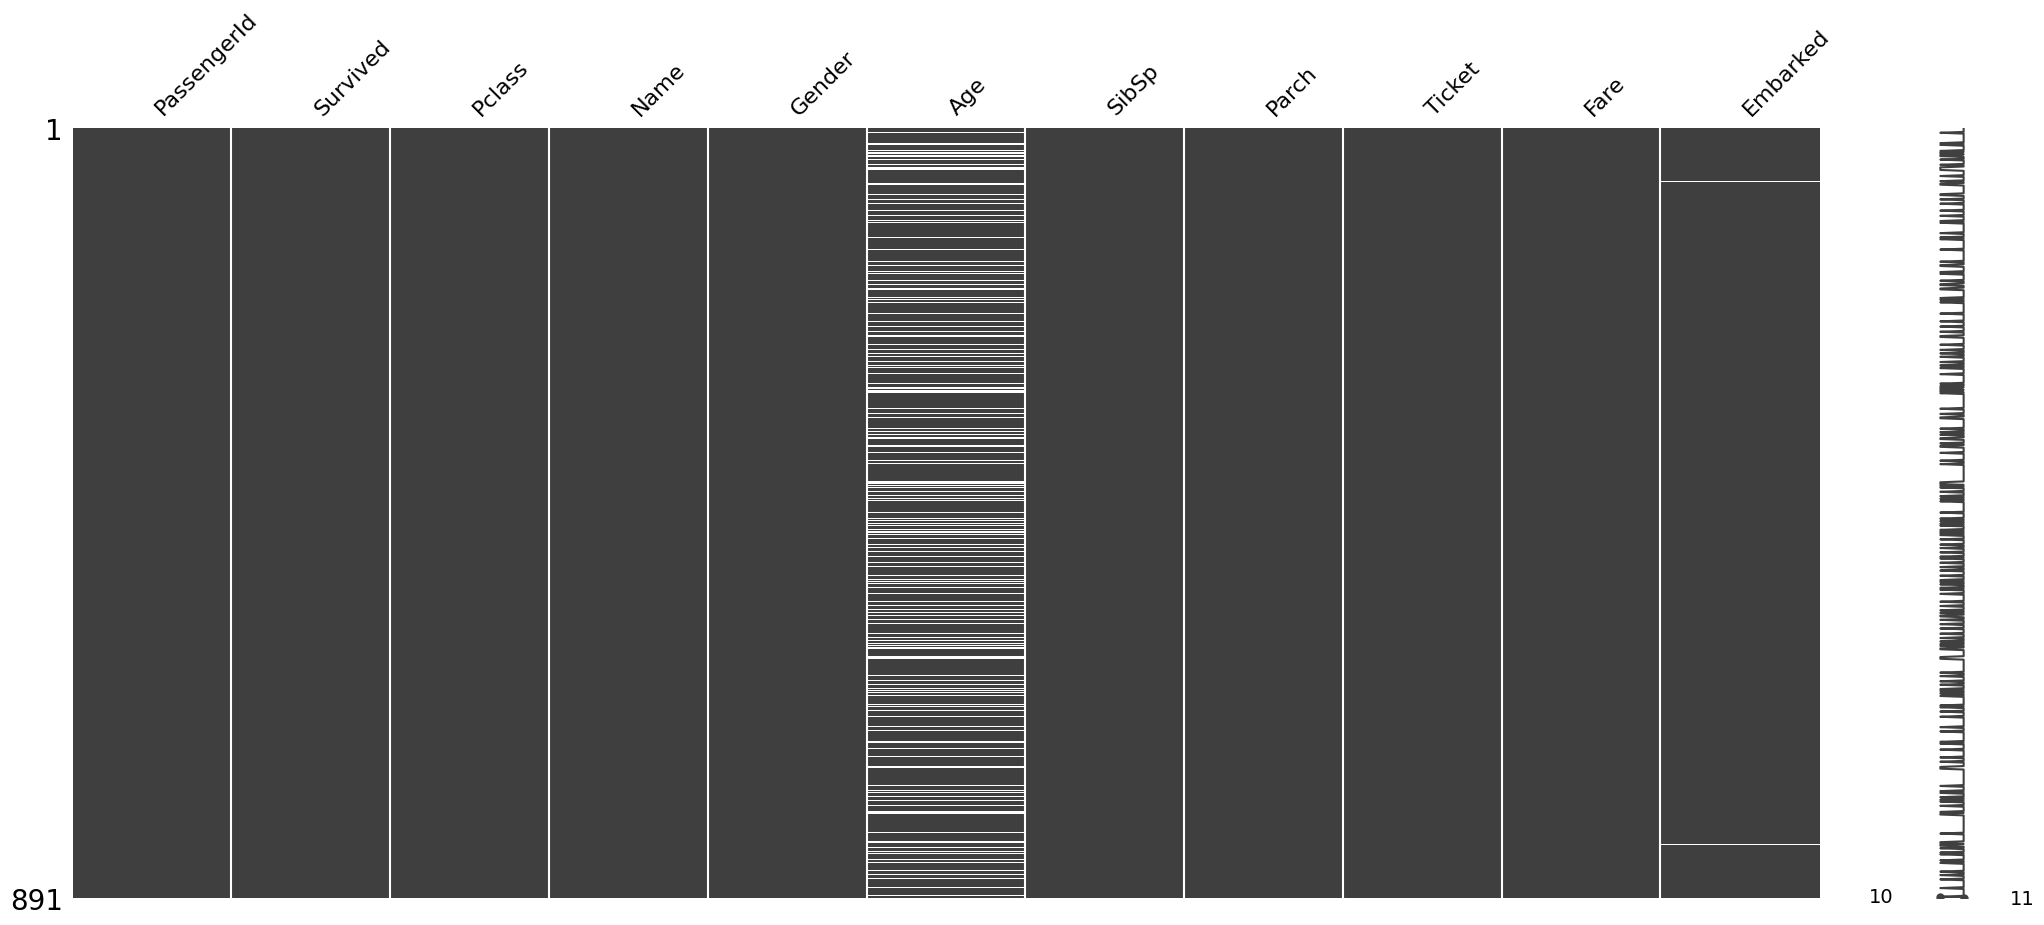

In [530]:
msno.matrix(Data)

<Axes: xlabel='Gender', ylabel='Survived'>

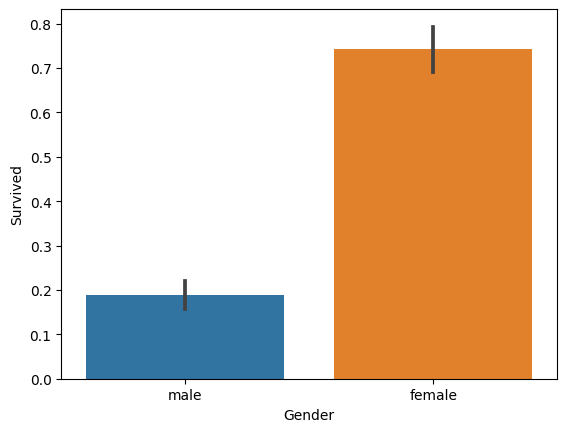

In [531]:
sns.barplot(data=Data,x='Gender',y='Survived')

<Axes: xlabel='Fare', ylabel='Age'>

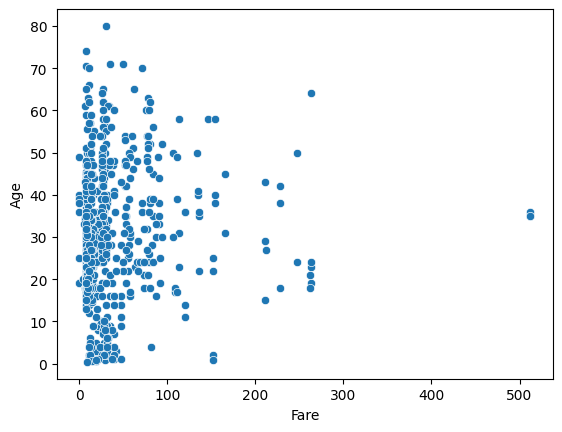

In [532]:
sns.scatterplot(data=Data,x='Fare',y='Age')

<Axes: xlabel='Gender', ylabel='Age'>

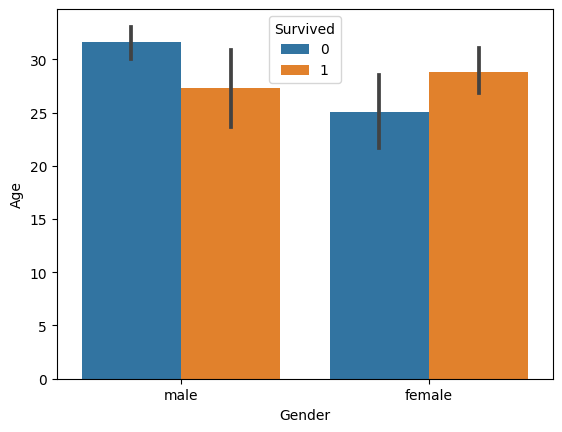

In [533]:
sns.barplot(data=Data,x='Gender',y='Age',hue='Survived')

<Axes: xlabel='Gender', ylabel='Fare'>

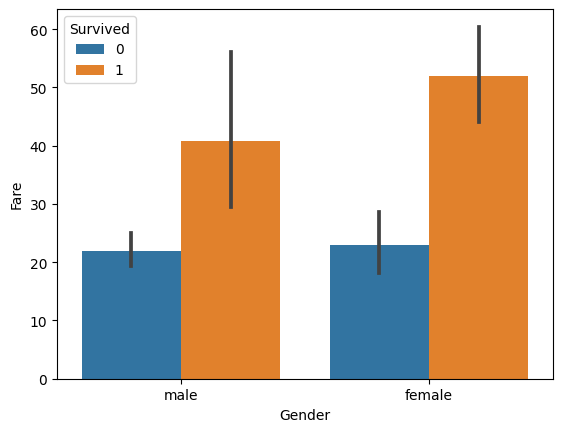

In [534]:
sns.barplot(data=Data,x='Gender',y='Fare',hue='Survived')

<Axes: xlabel='Survived', ylabel='count'>

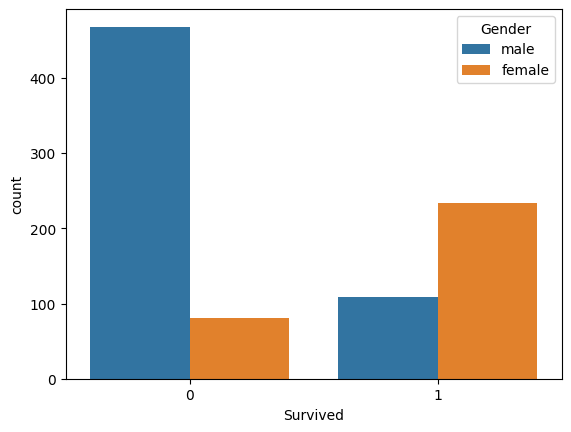

In [535]:
sns.countplot(data=Data,x='Survived',hue='Gender')

<Axes: xlabel='Survived', ylabel='count'>

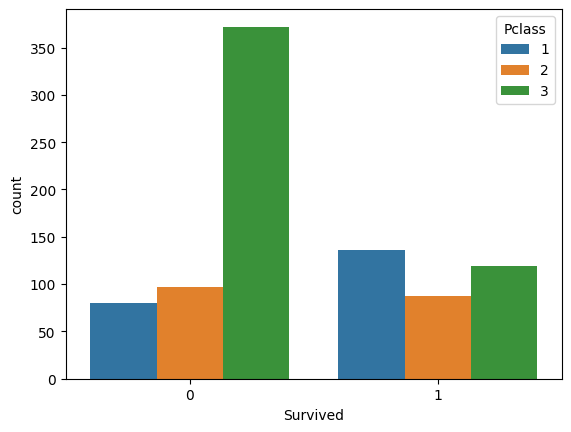

In [536]:
sns.countplot(data=Data,x='Survived',hue='Pclass')

<Axes: xlabel='Pclass', ylabel='Age'>

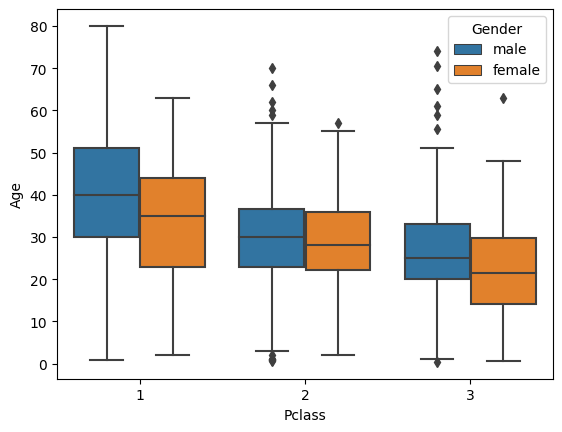

In [537]:
sns.boxplot(data=Data,x='Pclass',y='Age',hue='Gender')

<Axes: xlabel='Pclass', ylabel='Age'>

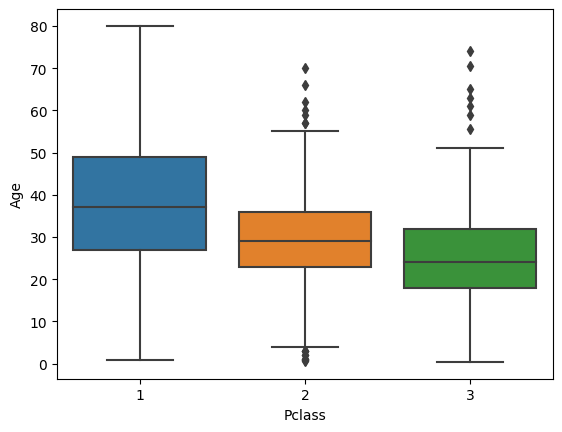

In [538]:
sns.boxplot(data=Data,x='Pclass',y='Age')

In [539]:
def fill_age(row):
  pclass = row[0]
  age=row[1]
  if pd.isnull(age):
    if pclass ==1:
      return 37
    elif pclass == 2:
      return 31
    elif pclass == 3:
      return 21
  return age

In [540]:
Data['Age']=Data[['Pclass','Age']].apply(fill_age,axis=1)

<Axes: >

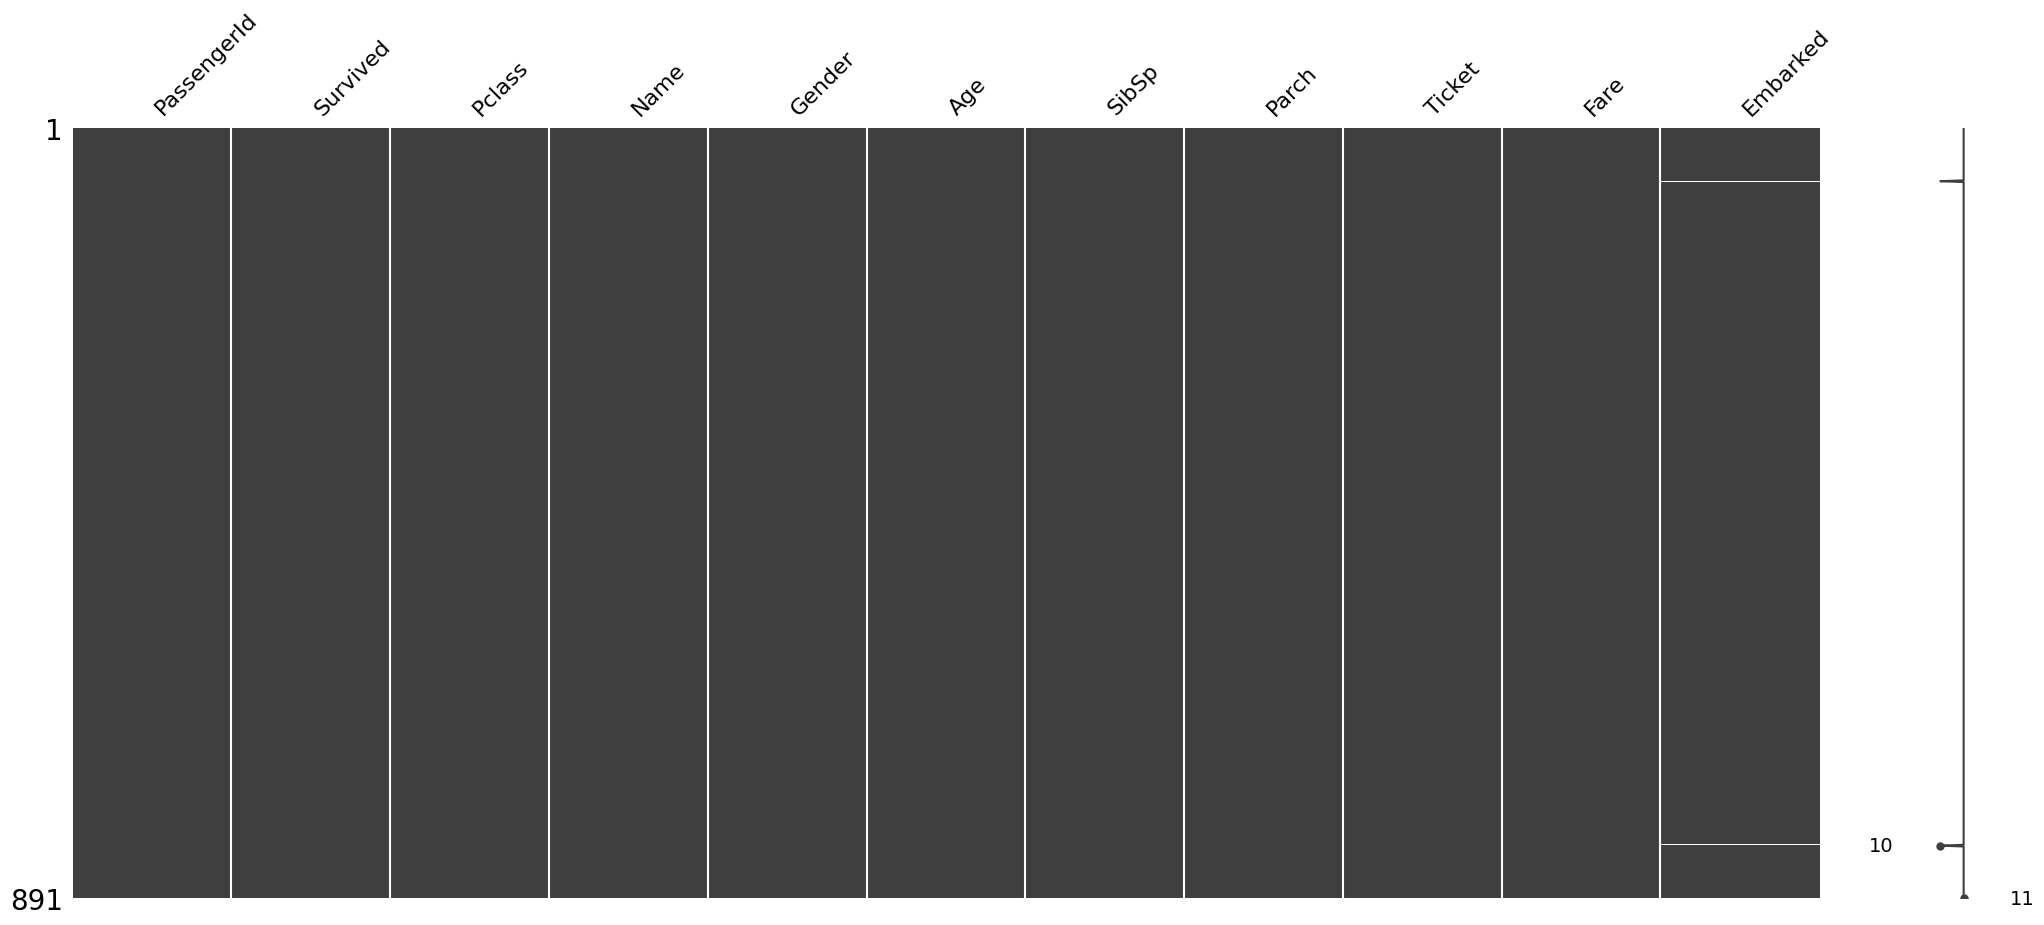

In [541]:
msno.matrix(Data)

In [542]:
Data.dropna(inplace=True)

In [543]:
Data.reset_index(drop=True,inplace=True)

In [544]:
Data.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

In [545]:
Data.head()

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [546]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder


In [547]:
label=LabelEncoder()
one_hot=OneHotEncoder()

In [548]:
label.fit(Data["Gender"])

LabelEncoder()

In [549]:
Data['Gender'] = label.transform(Data['Gender'])

In [550]:
one_hot.fit(Data[['Embarked']])

OneHotEncoder()

In [551]:
temp_arr=one_hot.transform(Data[['Embarked']]).toarray()

In [552]:
Data['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [553]:
second = pd.DataFrame(temp_arr,columns=['S','C','Q'],dtype=int)

In [554]:
Data = pd.concat([Data , second], axis=1)

In [555]:
Data.drop('Embarked',axis=1,inplace=True)

In [556]:
Data.head()

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,S,C,Q
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1


In [557]:
X=Data.drop('Survived',axis=1)

In [558]:
Y=Data['Survived']

In [559]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [560]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()

In [561]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=100)

In [562]:
logistic.fit(X_train, y_train)

logistic.predict(X_test)[0]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0

In [563]:
logistic.predict(X_test)[9]

1

In [570]:
predictions = logistic.predict(X_test)

In [572]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(predictions,y_test))

[[97 20]
 [17 44]]


<Axes: >

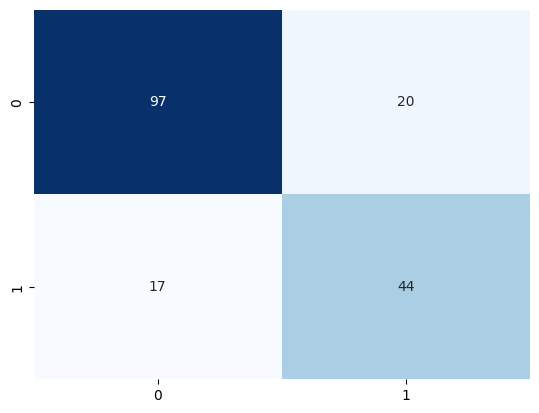

In [578]:
cm = confusion_matrix(predictions, y_test)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
